In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df =pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [25]:
# Check data Shape
df.shape

(7752, 25)

In [26]:
# Check Null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [27]:
# Check Columns List
print(df.columns.to_list())

['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


# Target Setting


In [28]:
target=['Next_Tmax','Next_Tmin']
datay=df[target]
datax=df.drop(target,axis=1)

In [29]:
print(datay[0:2].T)
print(datax[0:2].T)

              0     1
Next_Tmax  29.1  30.5
Next_Tmin  21.2  22.5
                            0           1
station                   1.0         2.0
Date               30-06-2013  30-06-2013
Present_Tmax             28.7        31.9
Present_Tmin             21.4        21.6
LDAPS_RHmin         58.255688   52.263397
LDAPS_RHmax         91.116364   90.604721
LDAPS_Tmax_lapse    28.074101   29.850689
LDAPS_Tmin_lapse    23.006936   24.035009
LDAPS_WS             6.818887     5.69189
LDAPS_LH            69.451805   51.937448
LDAPS_CC1            0.233947    0.225508
LDAPS_CC2            0.203896    0.251771
LDAPS_CC3            0.161697    0.159444
LDAPS_CC4            0.130928    0.127727
LDAPS_PPT1                0.0         0.0
LDAPS_PPT2                0.0         0.0
LDAPS_PPT3                0.0         0.0
LDAPS_PPT4                0.0         0.0
lat                   37.6046     37.6046
lon                   126.991     127.032
DEM                   212.335     44.7624
Slope     

In [30]:
# Check Data tyeps
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [31]:
# Check data skew
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [32]:
# Data Describe
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


# Univariate Analysis

In [33]:
# Separating categorical and continuous variables
cont=[i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat=[i for i in df.columns if df[i].nunique()<30]

0.514100    310
0.266100    310
1.231300    310
0.572100    310
2.785000    310
2.257900    310
5.178200    310
0.505500    310
0.222300    310
2.686500    310
0.133200    310
1.562900    310
0.155400    310
2.534800    310
0.145700    310
0.855200    310
0.098500    310
0.697000    310
0.593100    310
1.767800    310
0.412500    310
0.618000    310
0.271300    310
4.729600    310
0.623300    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

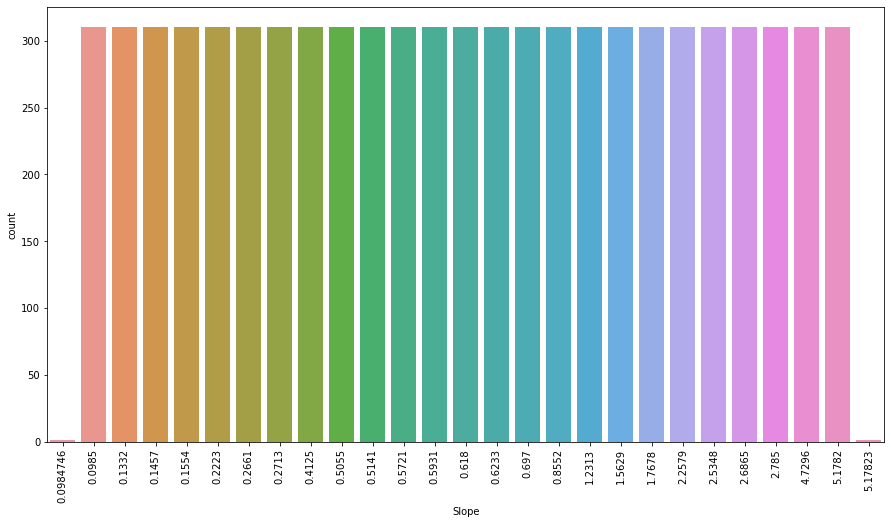

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=90)
df['Slope'].value_counts()

212.3350    311
12.3700     311
30.0464     310
82.2912     310
15.5876     310
45.7160     310
17.2956     310
52.5180     310
208.5070    310
54.6384     310
59.8324     310
132.1180    310
30.9680     310
33.3068     310
53.4712     310
50.9312     310
44.7624     310
19.5844     310
26.2980     310
75.0924     310
28.7000     310
56.4448     310
35.0380     310
146.5540    310
21.9668     310
Name: DEM, dtype: int64

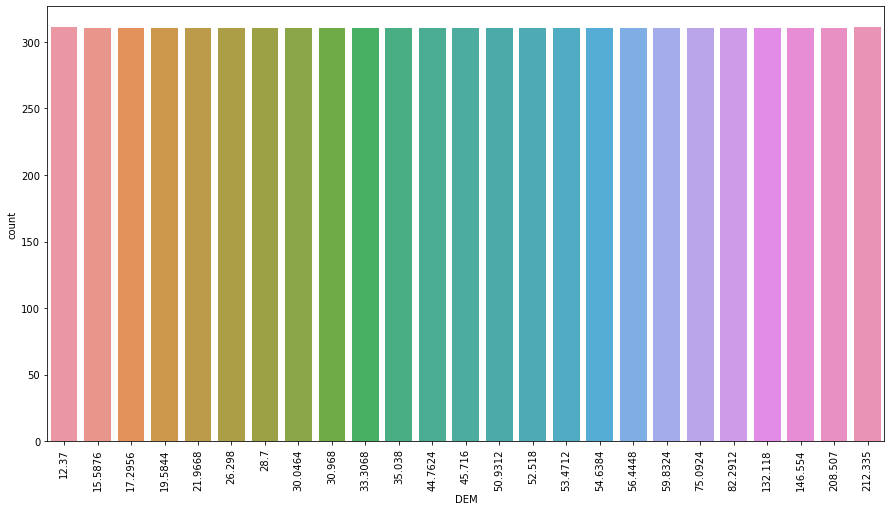

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
plt.xticks(rotation=90)
df['DEM'].value_counts()

127.135    311
126.826    311
127.024    310
127.004    310
127.086    310
127.083    310
127.022    310
127.032    310
126.938    310
127.085    310
126.910    310
126.937    310
126.927    310
126.970    310
126.991    310
126.891    310
127.058    310
126.988    310
126.909    310
126.838    310
126.995    310
127.042    310
126.955    310
127.099    310
127.040    310
Name: lon, dtype: int64

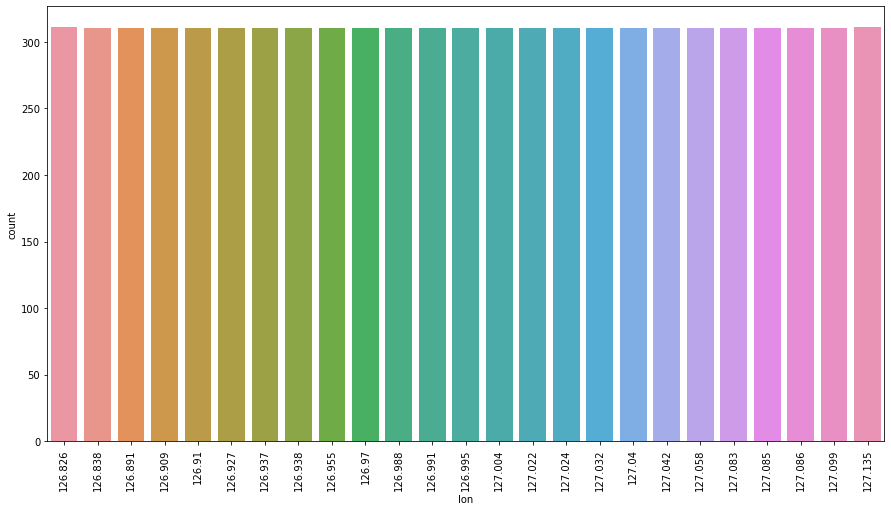

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='lon',data=df)
plt.xticks(rotation=90)
df['lon'].value_counts()

37.5507    1240
37.5776    1240
37.6046     620
37.4967     620
37.5372     620
37.4697     620
37.5102     620
37.5237     620
37.6181     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

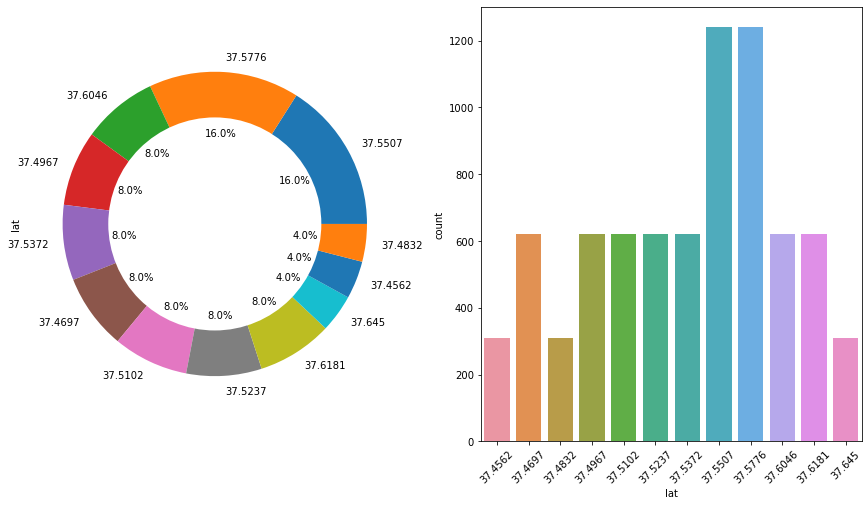

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=df)
plt.xticks(rotation=45)
df['lat'].value_counts()

15.0    310
21.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
13.0    310
12.0    310
9.0     310
24.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
14.0    310
Name: station, dtype: int64

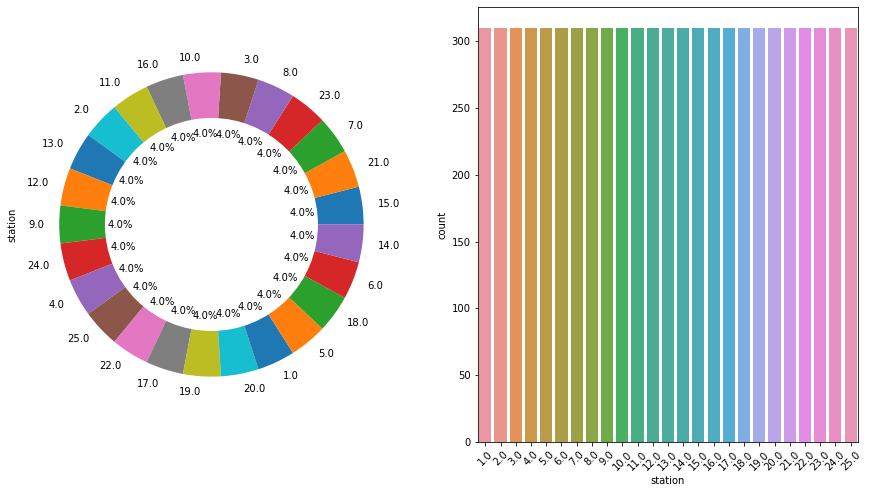

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['station'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='station',data=df)
plt.xticks(rotation=45)
df['station'].value_counts()

Minimum Tmax is 20.0 and Maximum Tmax is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


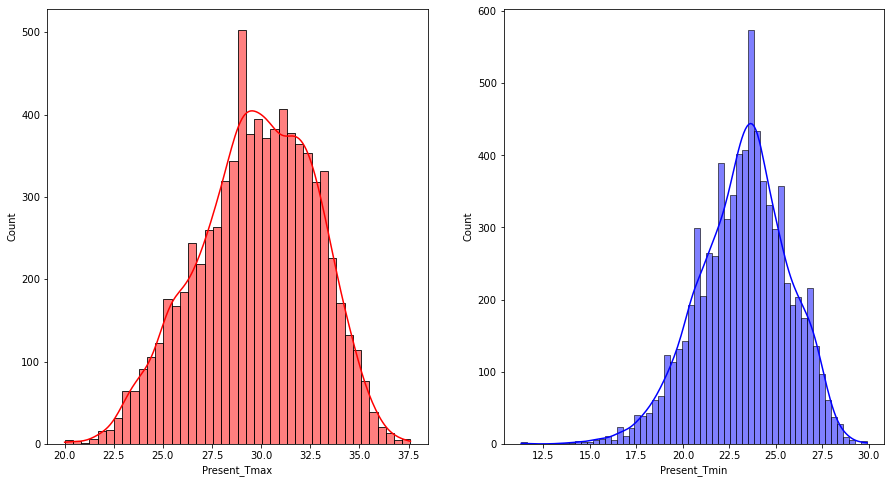

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(df['Present_Tmax'].min(),df['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(df['Present_Tmin'].min(),df['Present_Tmin'].max()))

Minimum RHmax is 58.93628311 and Maximum RHmax is 100.0001526
Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345


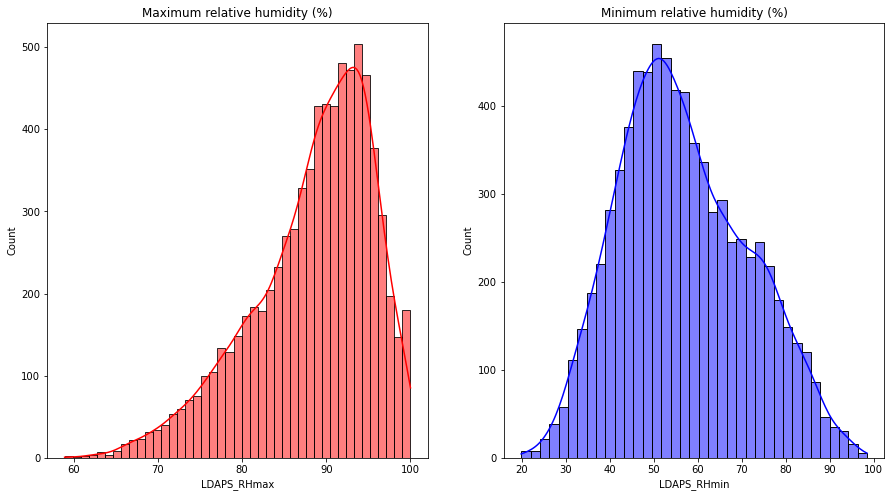

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Minimum Tmax applied lapse rate is 17.62495378 and Maximum Tmax applied lapse rate is 38.54225522
Minimum Tmin is applied lapse rate 14.27264631 and Maximum Tmin applied lapse rate is 29.61934244


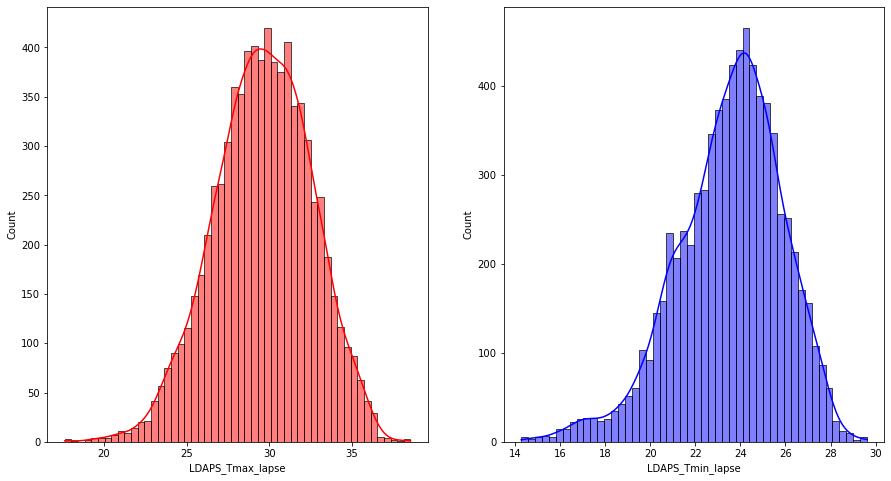

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='b')
print('Minimum Tmax applied lapse rate is {} and Maximum Tmax applied lapse rate is {}'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} and Maximum Tmin applied lapse rate is {}'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

Minimum 2.882579625
Maximum 21.85762099


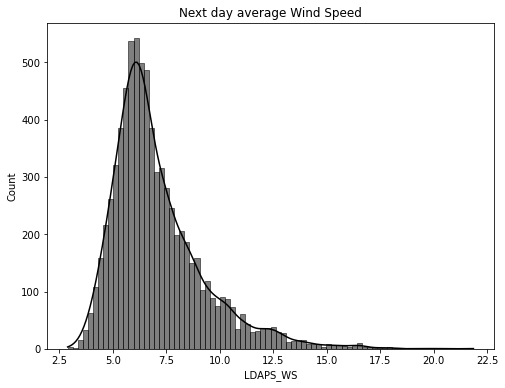

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='k')
plt.title('Next day average Wind Speed')
print('Minimum',df['LDAPS_WS'].min())
print('Maximum',df['LDAPS_WS'].max())

Minimum -13.60321209
Maximum 213.4140062


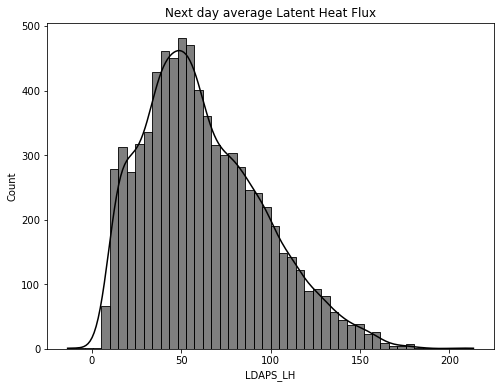

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_LH'],kde=True,color='k')
plt.title('Next day average Latent Heat Flux')
print('Minimum',df['LDAPS_LH'].min())
print('Maximum',df['LDAPS_LH'].max())

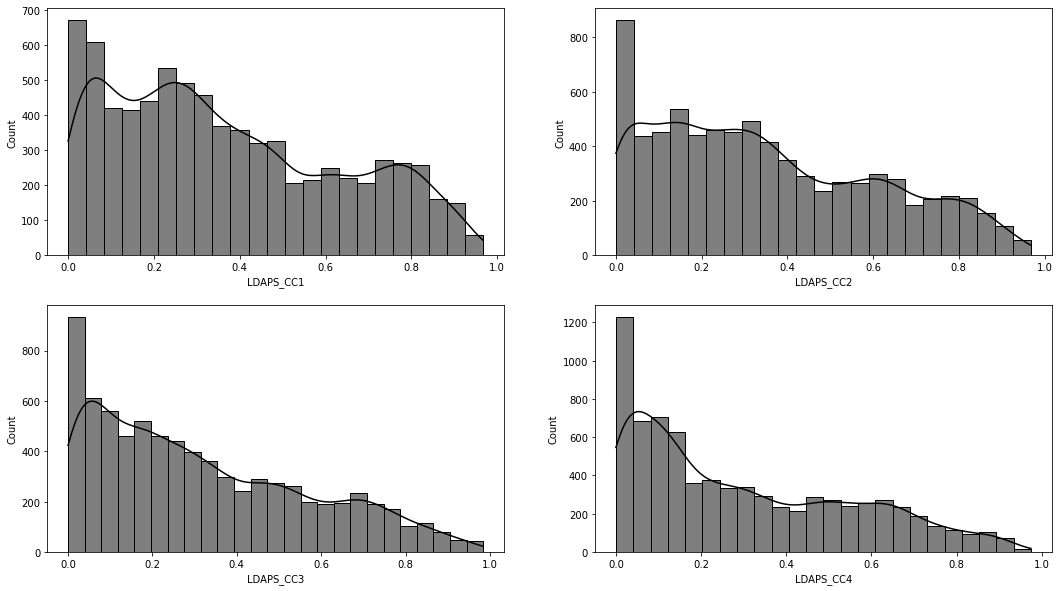

In [44]:
cloud_cover=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(cloud_cover):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.histplot(df[n],kde=True,color='k',ax=ax[r,c])
    c+=1

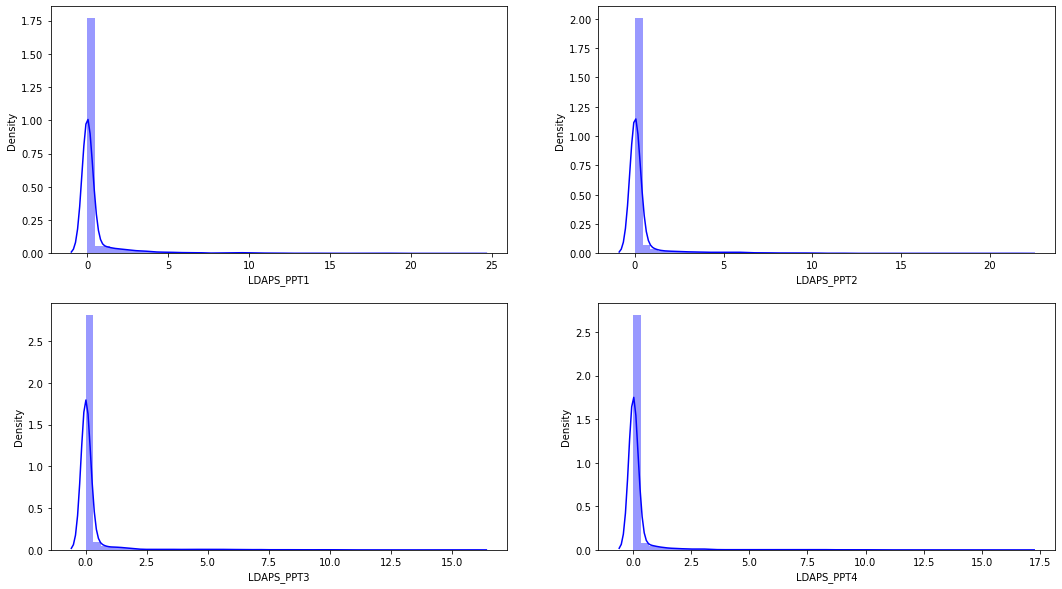

In [45]:
precipitation=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(precipitation):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='b',ax=ax[r,c])
    c+=1

Minimum 4329.520508
Maximum 5992.895996


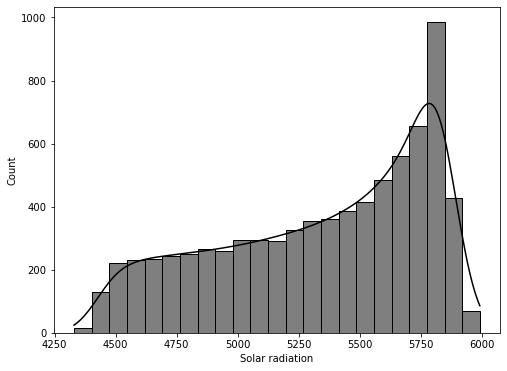

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='k')
print('Minimum',df['Solar radiation'].min())
print('Maximum',df['Solar radiation'].max())

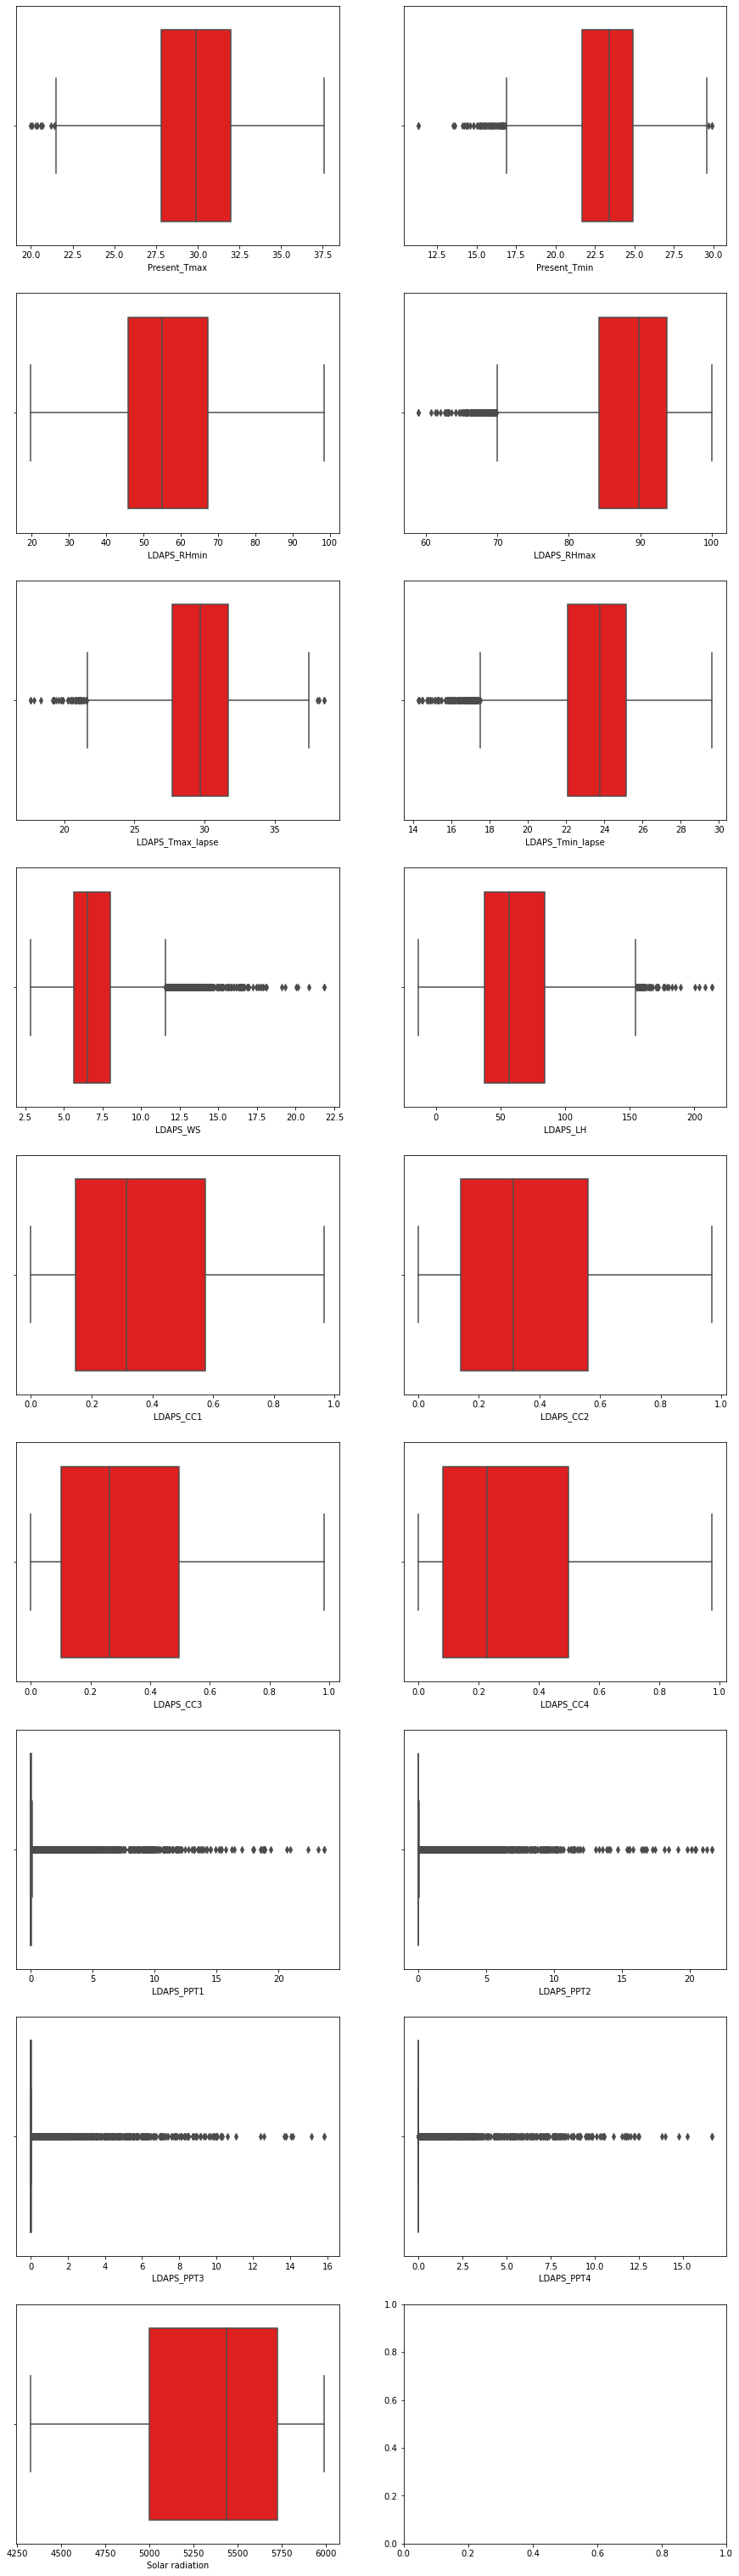

In [47]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],color='r',ax=ax[r,c])
    c+=1

# Bivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

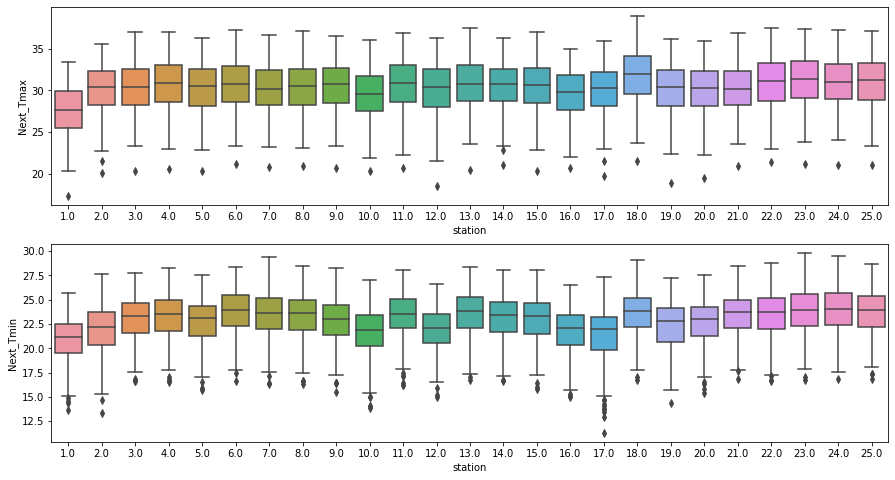

In [48]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

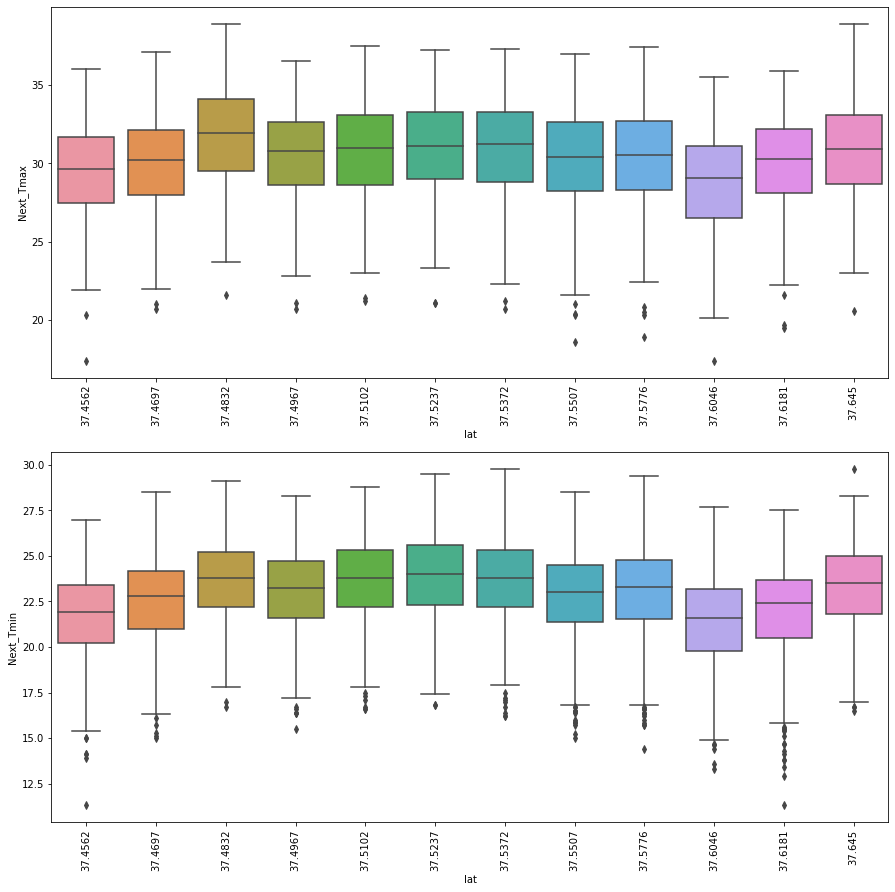

In [49]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

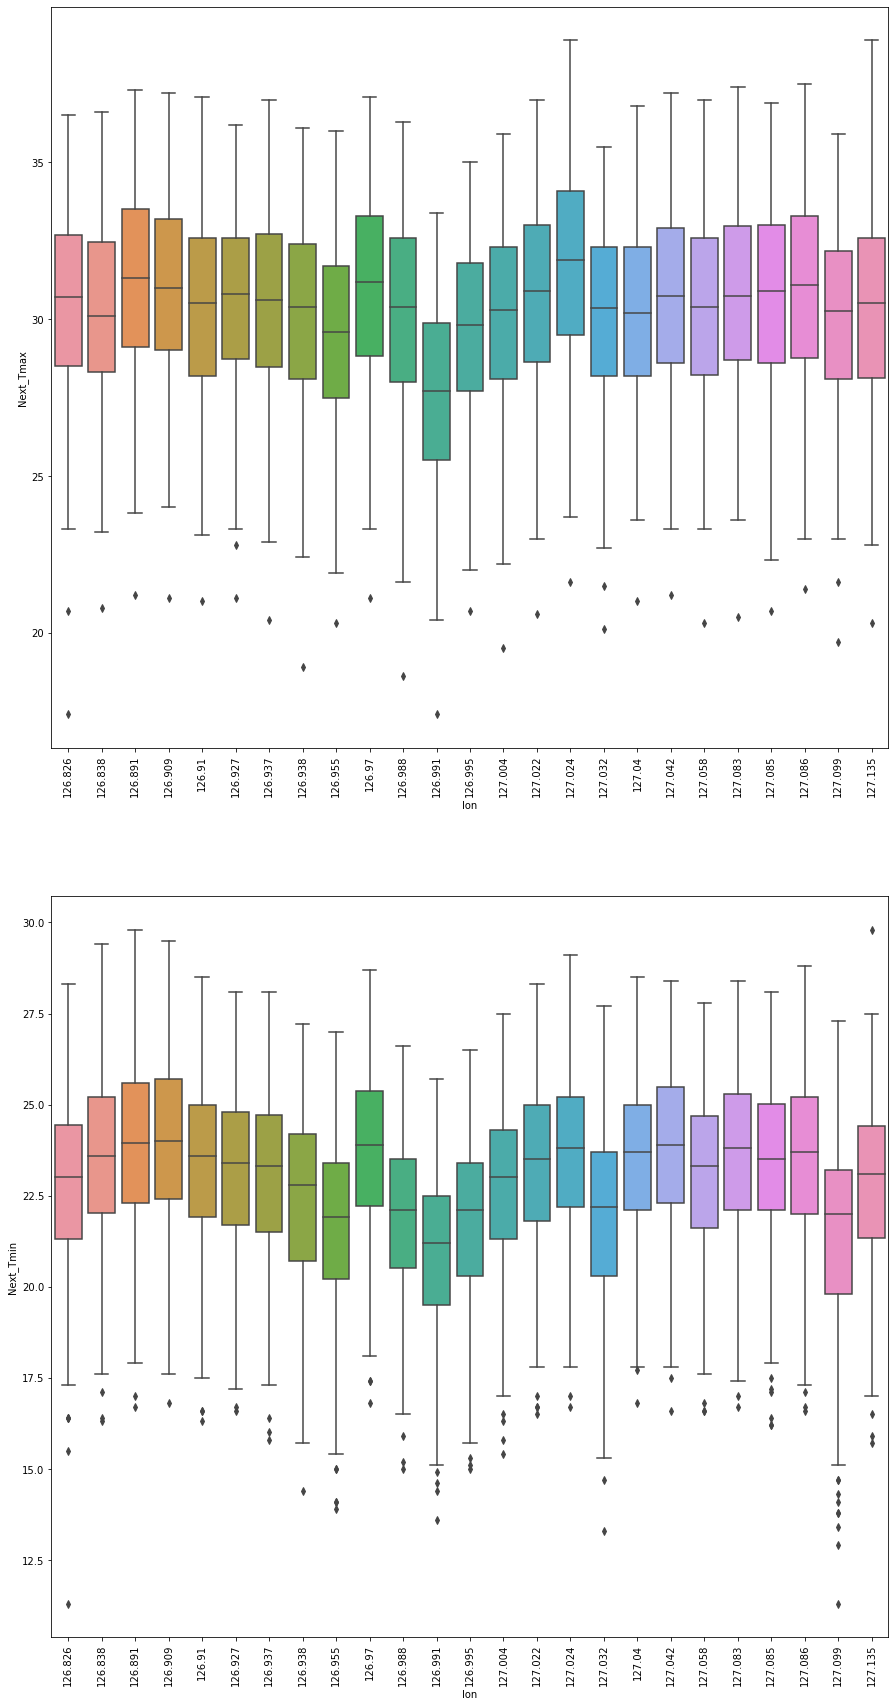

In [51]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

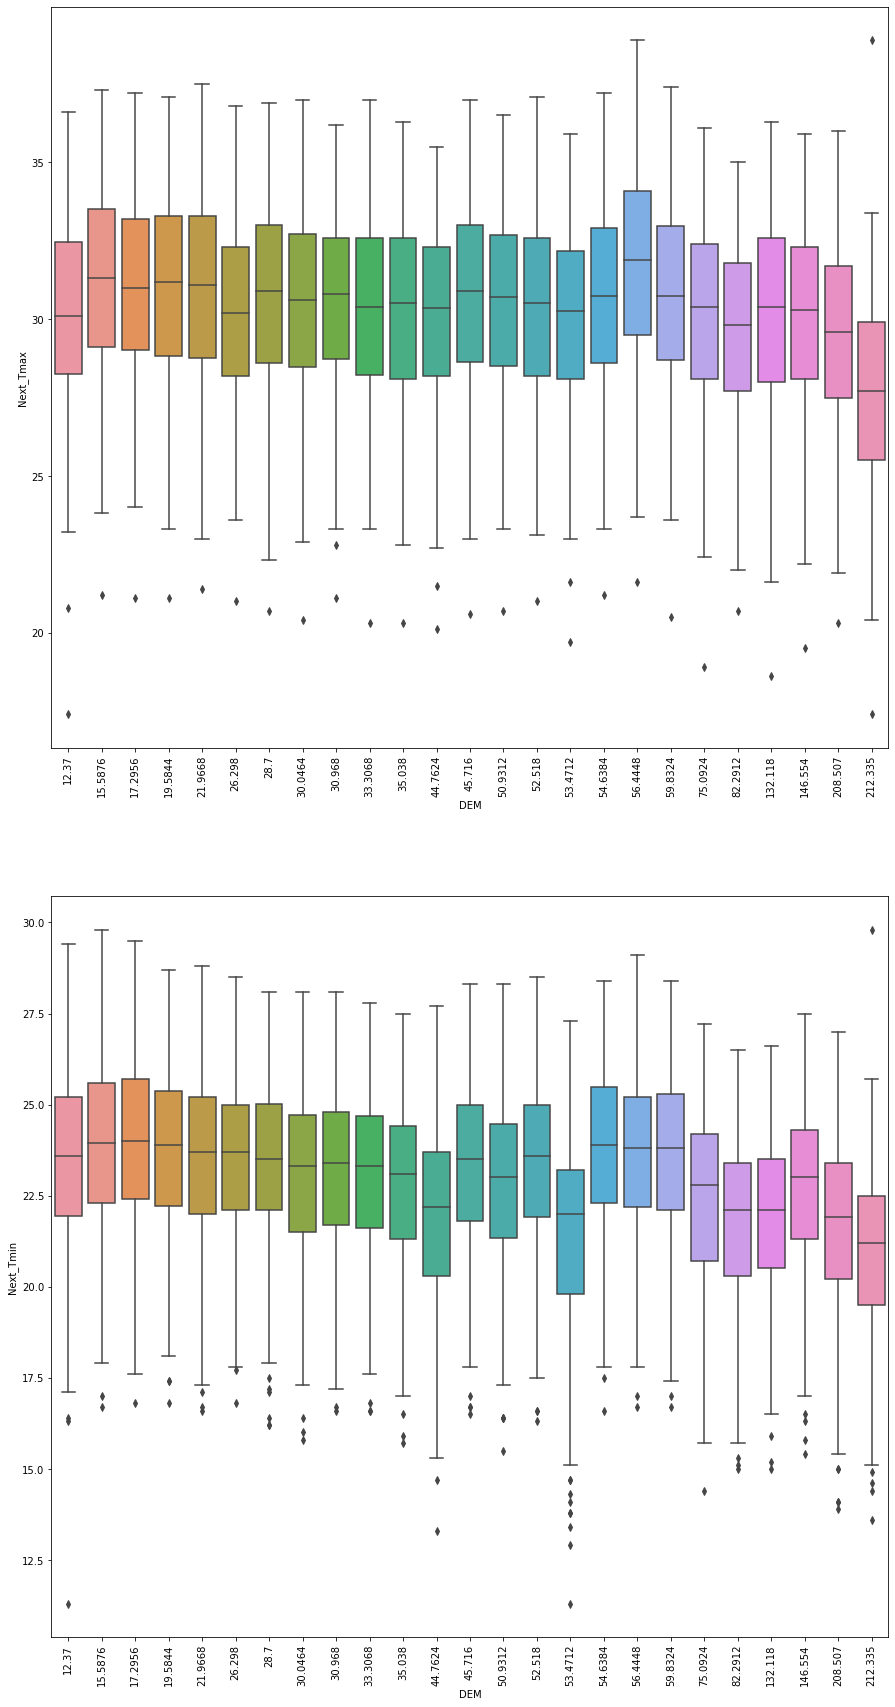

In [52]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.0984746'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.697'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

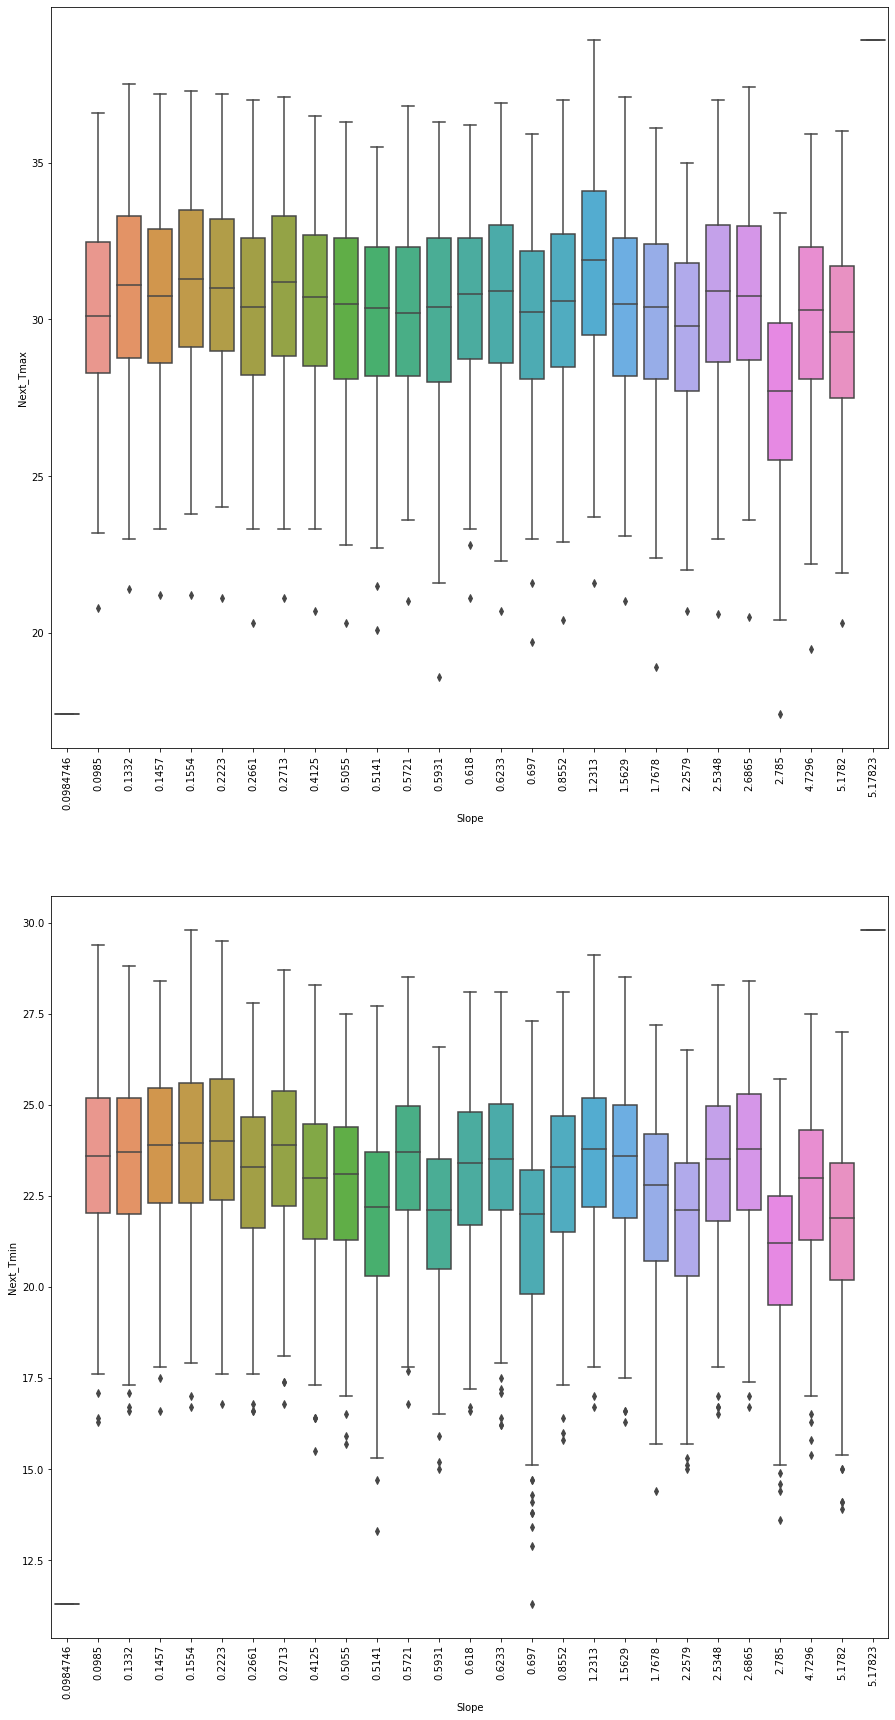

In [53]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

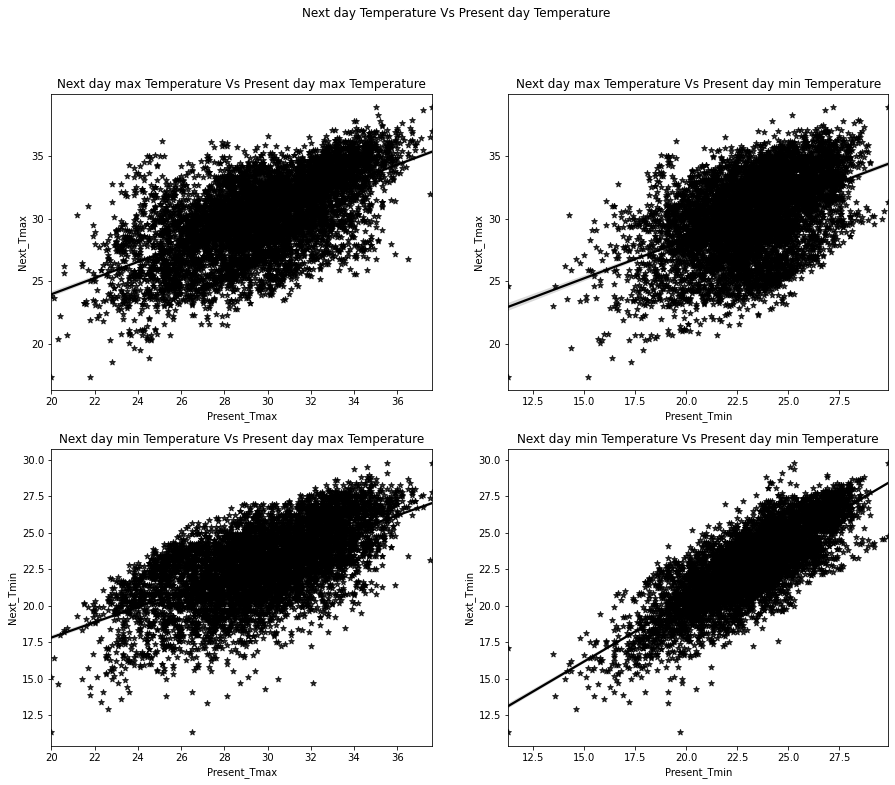

In [54]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker='*',color='k')


<AxesSubplot:title={'center':'Next day min Temperatures Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

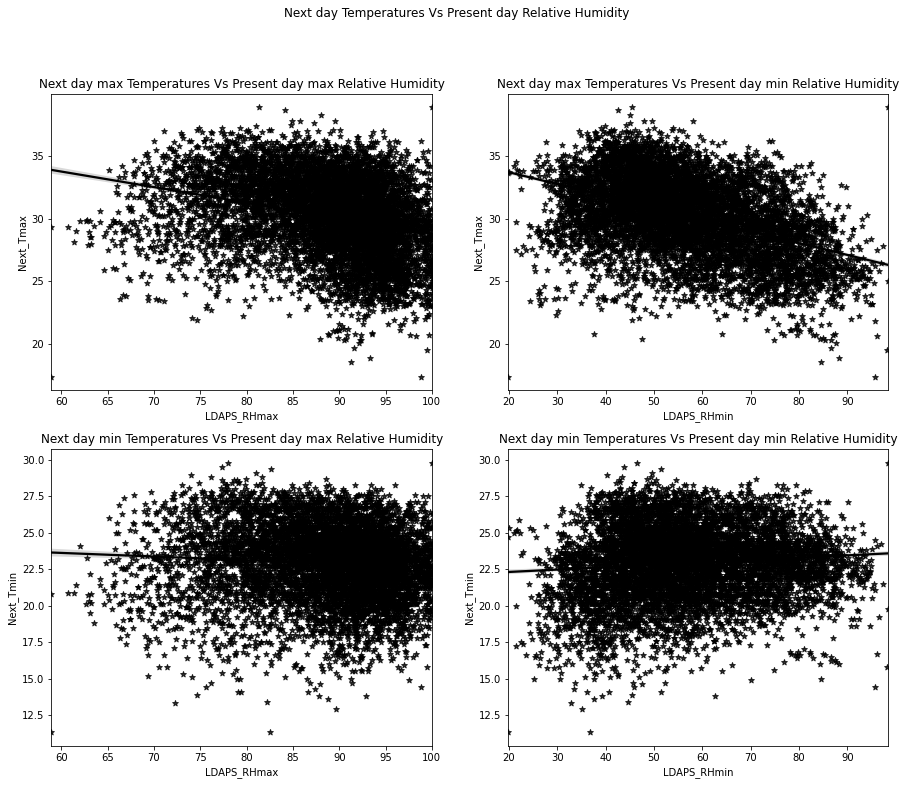

In [55]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperatures Vs Present day Relative Humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df,marker='*',color='k')

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

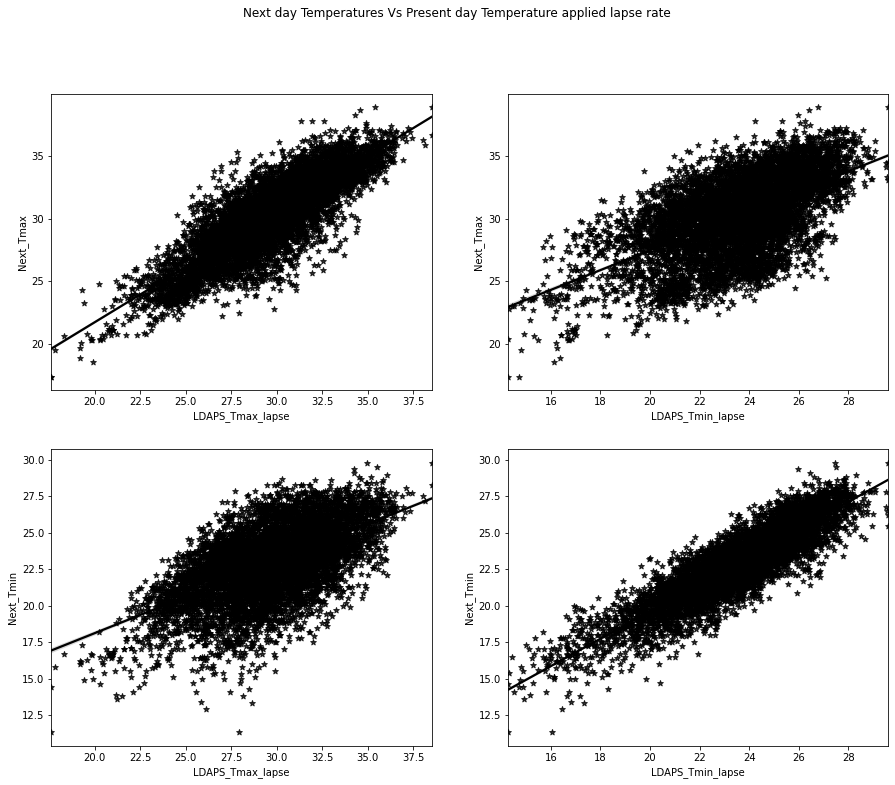

In [56]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperatures Vs Present day Temperature applied lapse rate')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df,marker='*',color='k')


<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

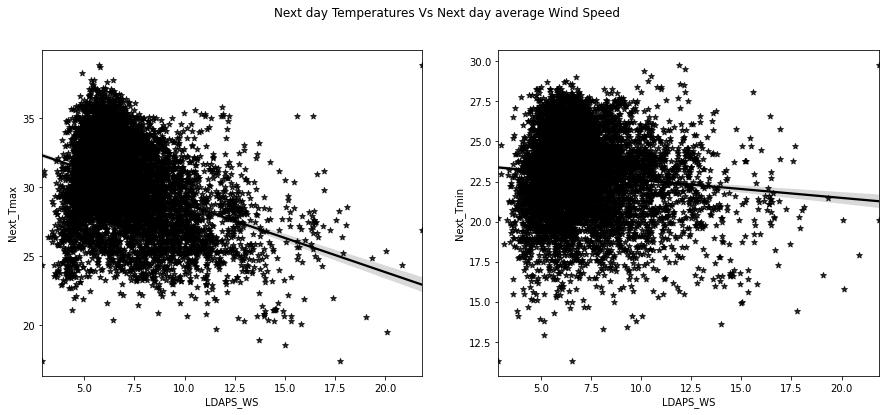

In [57]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Next day average Wind Speed')

plt.subplot(1,2,1)
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(1,2,2)
sns.regplot(x='LDAPS_WS',y='Next_Tmin',data=df,marker='*',color='k')

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

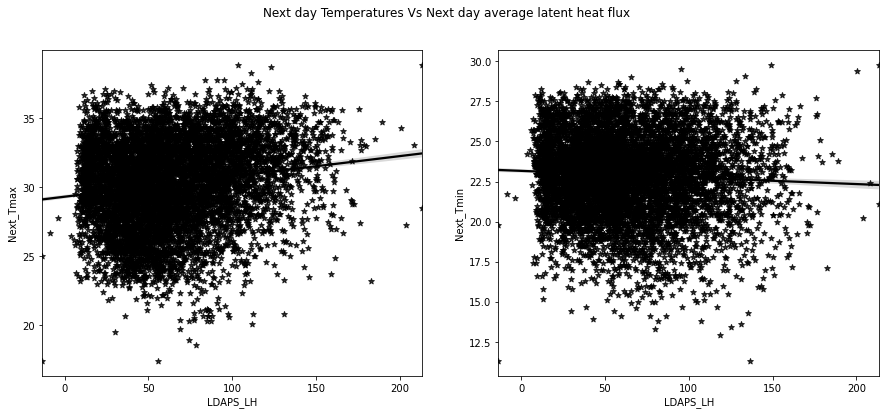

In [58]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Next day average latent heat flux')

plt.subplot(1,2,1)
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(1,2,2)
sns.regplot(x='LDAPS_LH',y='Next_Tmin',data=df,marker='*',color='k')

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

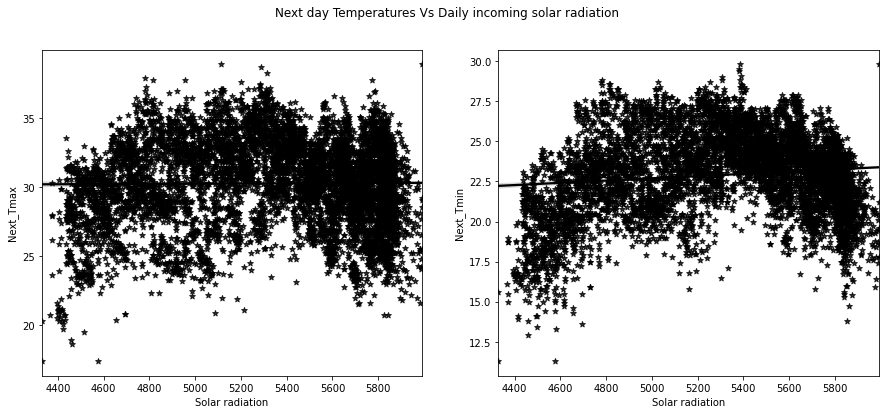

In [59]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Daily incoming solar radiation')

plt.subplot(1,2,1)
sns.regplot(x='Solar radiation',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(1,2,2)
sns.regplot(x='Solar radiation',y='Next_Tmin',data=df,marker='*',color='k')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

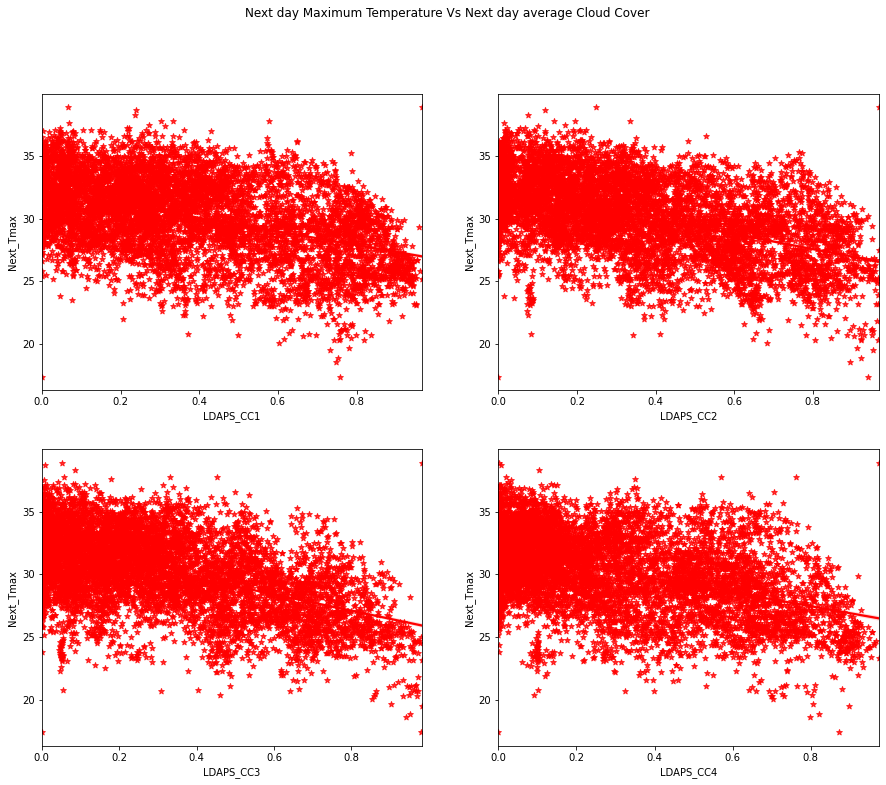

In [60]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Maximum Temperature Vs Next day average Cloud Cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df,marker='*',color='r')

<AxesSubplot:>

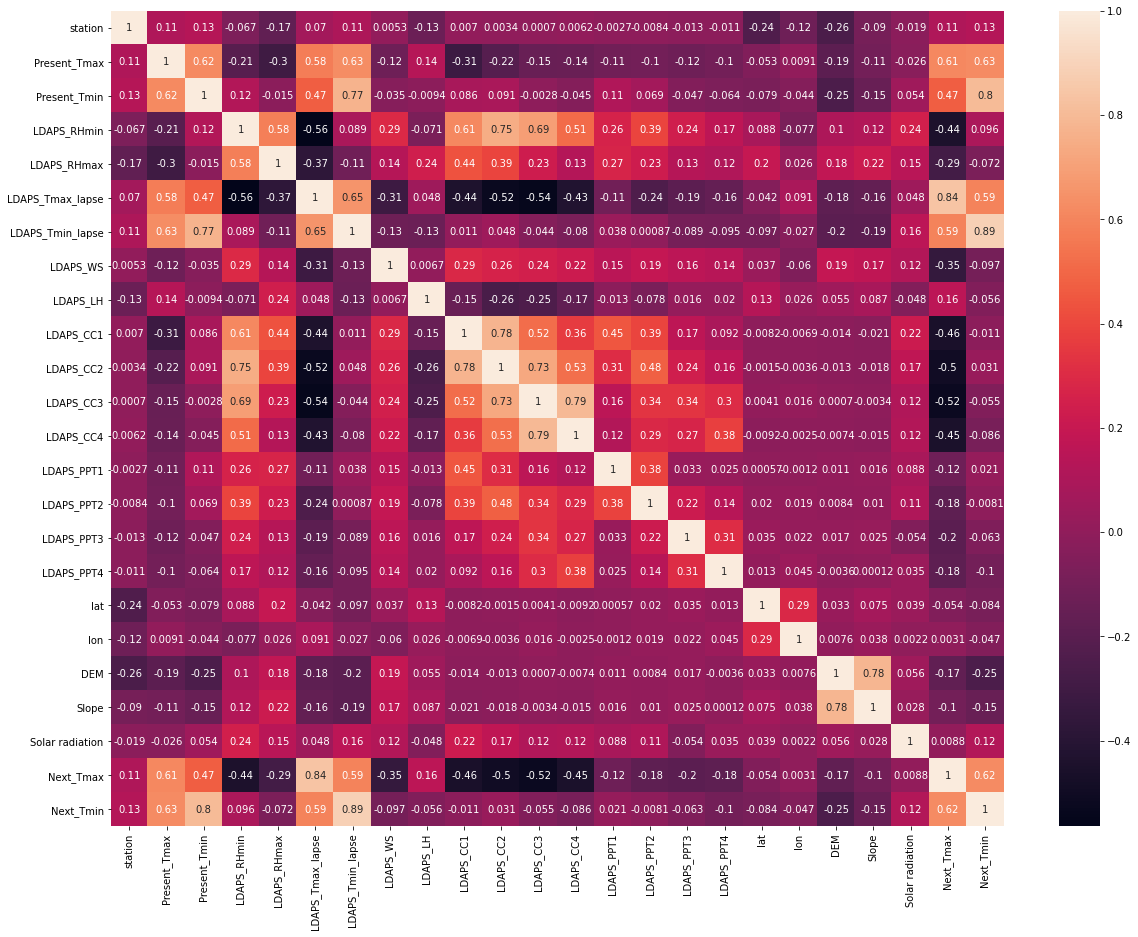

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [64]:
# drop the columns
df.drop('Date',axis=1,inplace=True)

In [65]:
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

In [66]:
df['Slope'].replace({0.0984746:0.0985,5.17823:5.1782},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.697'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

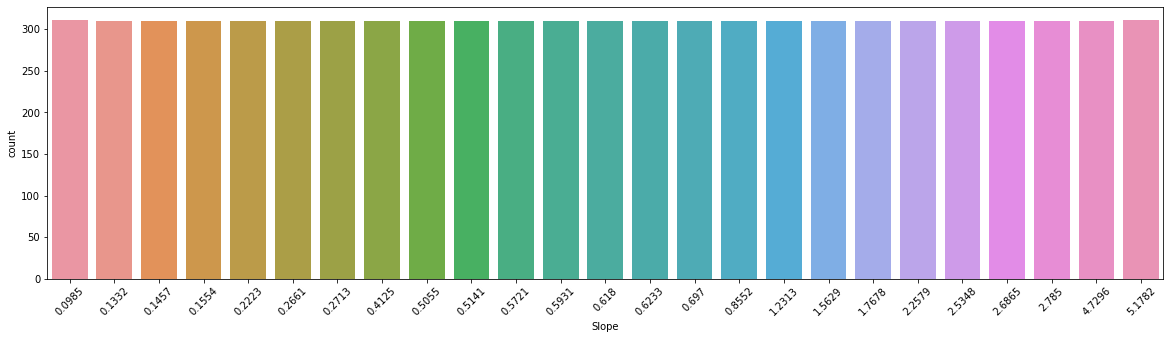

In [67]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

In [68]:
from scipy.stats import mode

In [69]:
# We need to drop these rows as these are the label columns cannot impute null values to these 
df=df[df['Next_Tmax'].notnull()]

In [70]:
table=pd.pivot_table(values='station',index='Slope',data=df)
table.head()

,station
Slope,
0.0985,7.0
0.1332,22.0
0.1457,6.0
0.1554,23.0
0.2223,24.0


In [71]:
def sta(x):
    return table.loc[x['Slope'],'station']

df['station'].fillna(df[df['station'].isnull()].apply(sta,axis=1),inplace=True)

In [72]:
df.dropna(subset=df.columns, thresh=14,inplace=True)

In [73]:
# We are dropping these null values as weel because upon evalution this gives better result than imputing these with mean values
df.dropna(inplace=True)

<AxesSubplot:>

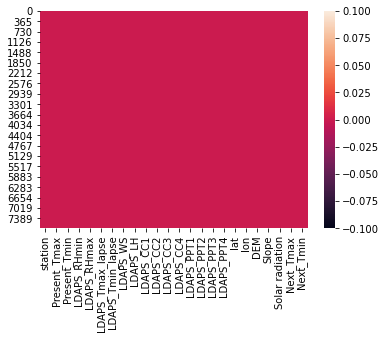

In [74]:
sns.heatmap(df.isnull())

In [78]:
# Using zscore method to remove outliers
from scipy.stats import zscore

In [79]:
# Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [80]:
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 11.09%
With threshold 3.2 data loss is 9.51%
With threshold 3.4 data loss is 8.38%
With threshold 3.6 data loss is 7.56%
With threshold 3.8 data loss is 6.89%
With threshold 4.0 data loss is 6.25%
With threshold 4.2 data loss is 5.8%
With threshold 4.4 data loss is 5.19%
With threshold 4.6 data loss is 4.74%
With threshold 4.8 data loss is 4.37%


In [81]:
# We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
df=df[(z<4.2).all(axis=1)]

In [82]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [83]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

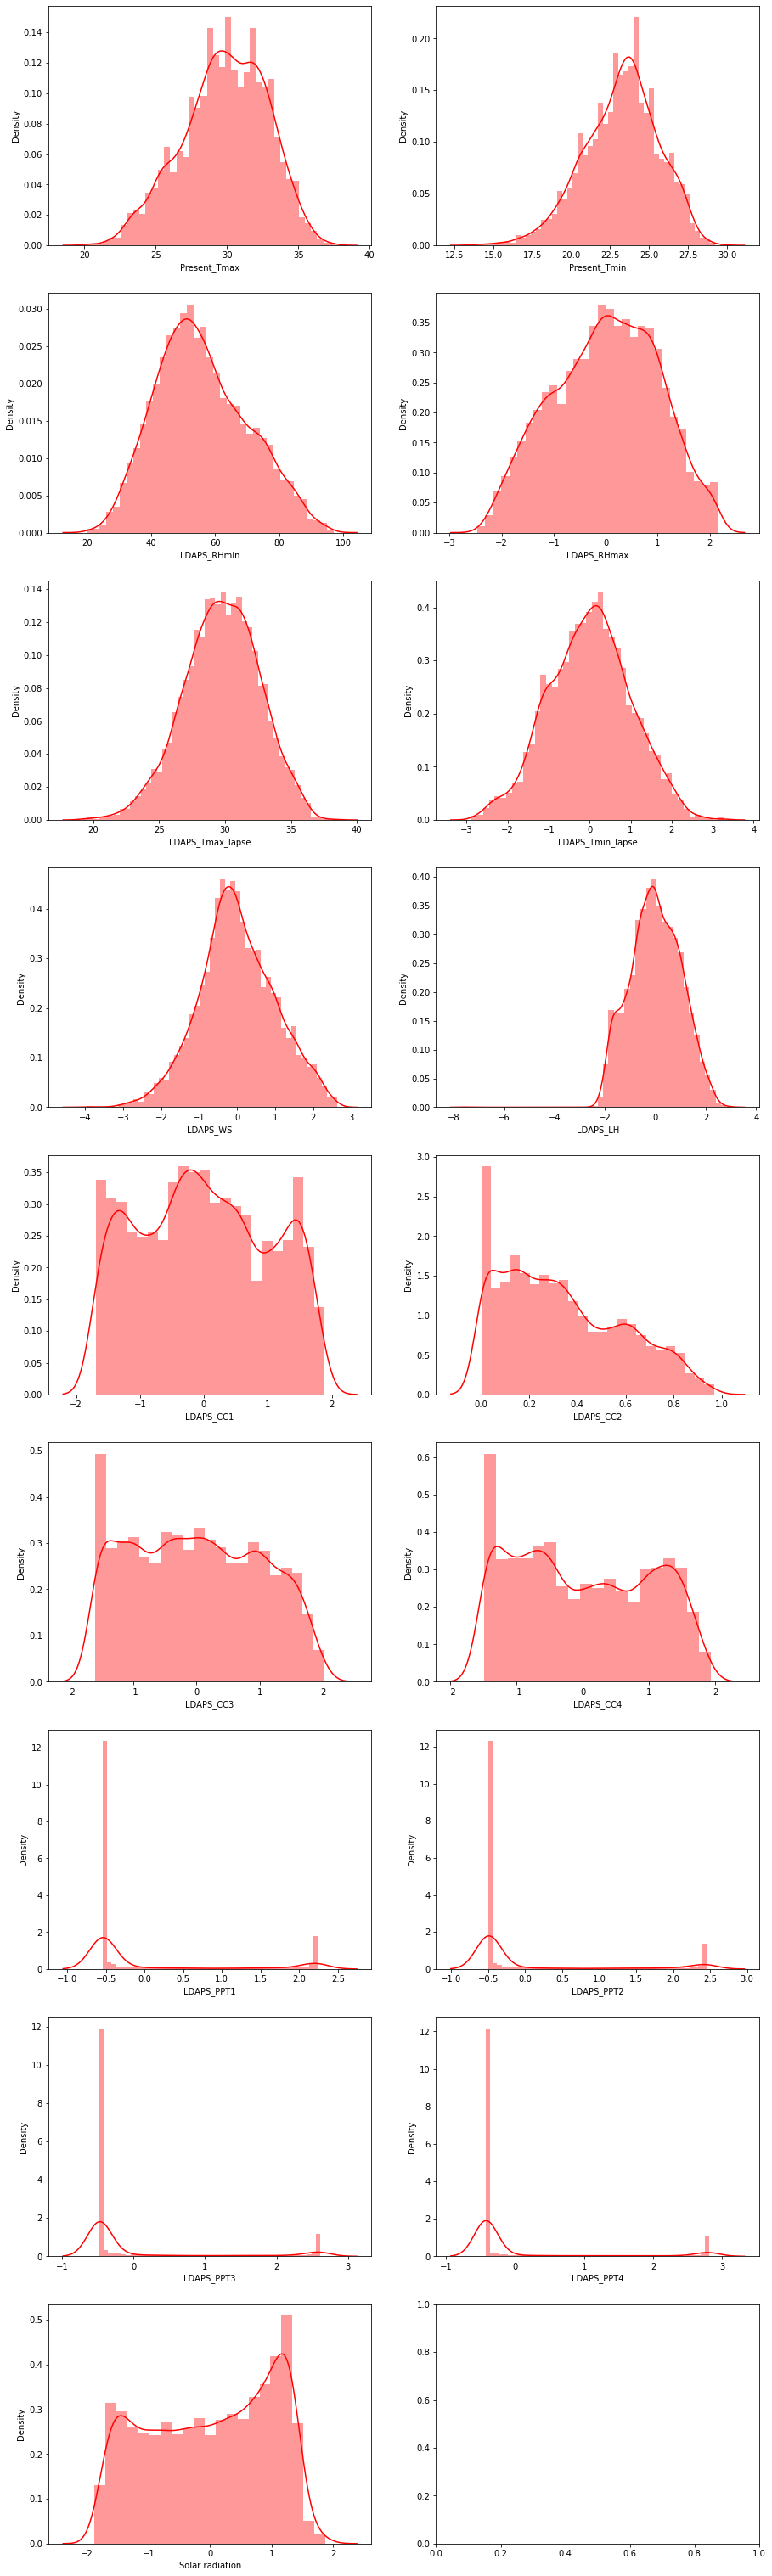

In [84]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='r',ax=ax[r,c])
    c+=1

In [85]:
# Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

In [86]:
# Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [87]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modeling Phase


In [89]:
from sklearn.model_selection import train_test_split,cross_val_score

In [90]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [91]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [92]:
# Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [93]:
# Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [94]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [95]:
createmodels(models,x,ymax,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,1.0486,1.9802,1.4072,7.000000e+01,46.0
SVR,0.8697,1.4167,1.1903,8.000000e+01,65.0
LinearRegression,1.0466,1.9357,1.3913,7.200000e+01,70.0
Lasso,2.4591,9.0494,3.0082,-1.792426e+31,-7.0
Ridge,1.0470,1.9379,1.3921,7.200000e+01,70.0
DecisionTreeRegressor,1.0990,2.3556,1.5348,7.400000e+01,45.0
RandomForestRegressor,0.7316,0.9570,0.9782,8.700000e+01,68.0
AdaBoostRegressor,1.1555,2.0890,1.4453,6.400000e+01,66.0
GradientBoostingRegressor,0.8874,1.3534,1.1633,8.100000e+01,70.0


In [96]:
createmodels(models,x,ymin,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.8176,1.1781,1.0854,7.200000e+01,47.0
SVR,0.6259,0.6434,0.8021,8.700000e+01,75.0
LinearRegression,0.7751,0.9477,0.9735,8.200000e+01,78.0
Lasso,1.9866,6.1585,2.4816,-4.879260e+31,-14.0
Ridge,0.7752,0.9478,0.9736,8.100000e+01,78.0
DecisionTreeRegressor,0.8718,1.4079,1.1865,7.700000e+01,57.0
RandomForestRegressor,0.5755,0.5570,0.7463,8.900000e+01,78.0
AdaBoostRegressor,0.8618,1.1259,1.0611,7.600000e+01,75.0
GradientBoostingRegressor,0.6446,0.6661,0.8161,8.700000e+01,80.0


In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [99]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [100]:
importance = np.abs(m1.coef_)

In [101]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,station,0.414667
1,Present_Tmax,2.892366
2,Present_Tmin,0.439141
3,LDAPS_RHmin,1.867211
4,LDAPS_RHmax,0.033401
5,LDAPS_Tmax_lapse,12.237564
6,LDAPS_Tmin_lapse,1.275452
7,LDAPS_WS,1.797137
8,LDAPS_LH,2.668634
9,LDAPS_CC1,0.298872


In [102]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymin)
print(m1.best_params_)

{'alpha': 0.001}


In [103]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymin)

Lasso(alpha=0.001)

In [104]:
importance = np.abs(m1.coef_)

In [105]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,station,0.000000
1,Present_Tmax,0.946818
2,Present_Tmin,3.799765
3,LDAPS_RHmin,1.725961
4,LDAPS_RHmax,0.567889
5,LDAPS_Tmax_lapse,2.436989
6,LDAPS_Tmin_lapse,8.335946
7,LDAPS_WS,0.608111
8,LDAPS_LH,0.228965
9,LDAPS_CC1,0.000000


In [106]:
xlasso=x.drop('station',axis=1)

In [107]:
createmodels(models,xlasso,ymin,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.7216,0.9345,0.9667,7.900000e+01,46.0
SVR,0.6172,0.6219,0.7886,8.800000e+01,75.0
LinearRegression,0.7749,0.9475,0.9734,8.200000e+01,78.0
Lasso,1.9866,6.1585,2.4816,-4.879260e+31,-14.0
Ridge,0.7751,0.9476,0.9735,8.100000e+01,78.0
DecisionTreeRegressor,0.8427,1.3388,1.1571,7.900000e+01,56.0
RandomForestRegressor,0.5713,0.5534,0.7439,8.900000e+01,78.0
AdaBoostRegressor,0.8641,1.1375,1.0666,7.500000e+01,74.0
GradientBoostingRegressor,0.6432,0.6567,0.8103,8.700000e+01,80.0


# For Next day Maximum Temperature

In [108]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))

In [109]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

In [110]:
g=GridSearchCV(Ridge(),params,cv=10)

In [111]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [113]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=0.1)
{'alpha': 0.1}
0.7637525257502655


In [114]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [115]:
score=cross_val_score(m,x,ymax,cv=10)

In [116]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0466
Mean Squared Error is 1.9358
Root Mean Squared Error is 1.3913
R2 Score is 72.11999999999999
Mean of cross validaton Score is 66.4305


# Random Forest

In [118]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [121]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [122]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=3)
{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': None}
0.8820148272345953


In [124]:
m=RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,n_estimators=200)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [123]:
score=cross_val_score(m,x,ymax,cv=10)

In [125]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7475
Mean Squared Error is 0.9901
Root Mean Squared Error is 0.995
R2 Score is 86.56
Mean of cross validaton Score is 66.4305


# For Next day Minimun Temperature

In [126]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(xlasso,ymin,test_size=0.25,random_state=randomstate(xlasso,ymin))

# Random Forest

In [127]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25]}

In [128]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [129]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [130]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': None}
RandomForestRegressor(min_samples_split=3, n_estimators=300)
0.8988116710063231


In [131]:
m=RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=300)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [132]:
score=cross_val_score(m,xlasso,ymin,cv=10)

In [133]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.5754
Mean Squared Error is 0.5571
Root Mean Squared Error is 0.7464
R2 Score is 89.36
Mean of cross validaton Score is 74.5846


# Finalizing the model

In [136]:
model_tmax=XGBRegressor(colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,max_depth=30, min_child_weight=10)
model_tmax.fit(xtrain_max,ytrain_max)
p_tmax=model_tmax.predict(xtest_max)
score_tmax=cross_val_score(m,x,ymax,cv=10)

In [137]:
model_tmin=XGBRegressor(colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,max_depth=30, min_child_weight=10)
model_tmin.fit(xtrain_min,ytrain_min)
p_tmin=model_tmin.predict(xtest_min)
score_tmin=cross_val_score(m,xlasso,ymin,cv=10)

# Evaluation Metrics

In [138]:
print('Evaluation Metrics for Next Day Maximum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmax,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmax,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmax,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p_tmax,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmax)*100,4))

Evaluation Metrics for Next Day Maximum Temperature
Mean Absolute Error is 0.6254
Mean Squared Error is 0.67
Root Mean Squared Error is 0.8186
R2 Score is 91.53999999999999
Mean of cross validaton Score is 64.789


In [139]:
print('Evaluation Metrics for Next Day Minimum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmin,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmin,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmin,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p_tmin,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmin)*100,4))

Evaluation Metrics for Next Day Minimum Temperature
Mean Absolute Error is 0.4585
Mean Squared Error is 0.3591
Root Mean Squared Error is 0.5992
R2 Score is 93.57
Mean of cross validaton Score is 74.543
